In [73]:
import pandas as pd
import requests
import time
import numpy as np
from sklearn.linear_model import LinearRegression
import time

In [74]:
def historical_data(api_key, limit= 2000):
    url = f'https://min-api.cryptocompare.com/data/v2/histohour'
    params= {
        'fsym':'BTC',
        'tsym':'USD',
        'limit': limit,
        'api_key': api_key
    }
    response = requests.get(url, params= params)
    data = response.json()['Data']['Data']
    return pd.DataFrame(data)

api_key = '42106eebd1098563dda1f2e1d169c50da3758d42c993794bd1aa93ff7c8a6ded'
df = historical_data(api_key)

In [75]:
df.head()

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
0,1711674000,70925.04,70672.49,70751.77,421.92,29883010.80,70813.12,direct,
1,1711677600,70836.74,70613.89,70813.12,336.40,23792961.10,70648.92,direct,
2,1711681200,70743.97,70319.52,70648.92,619.11,43644189.31,70459.53,direct,
3,1711684800,70539.64,70307.68,70459.53,808.39,56902664.86,70367.04,direct,
4,1711688400,70458.13,70202.51,70367.04,396.11,27850008.76,70202.51,direct,


In [76]:
df['conversionType'].unique()

array(['direct'], dtype=object)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   time              2001 non-null   int64  
 1   high              2001 non-null   float64
 2   low               2001 non-null   float64
 3   open              2001 non-null   float64
 4   volumefrom        2001 non-null   float64
 5   volumeto          2001 non-null   float64
 6   close             2001 non-null   float64
 7   conversionType    2001 non-null   object 
 8   conversionSymbol  2001 non-null   object 
dtypes: float64(6), int64(1), object(2)
memory usage: 140.8+ KB


## Drop useless columns

In [78]:
df = df.drop(columns=['conversionType', 'conversionSymbol'])
df.head()

,time,high,low,open,volumefrom,volumeto,close
0,1711674000,70925.04,70672.49,70751.77,421.92,29883010.80,70813.12
1,1711677600,70836.74,70613.89,70813.12,336.40,23792961.10,70648.92
2,1711681200,70743.97,70319.52,70648.92,619.11,43644189.31,70459.53
3,1711684800,70539.64,70307.68,70459.53,808.39,56902664.86,70367.04
4,1711688400,70458.13,70202.51,70367.04,396.11,27850008.76,70202.51


# Spliting the data

In [79]:
X = df.drop(columns=['close'])
y = df['close']

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

In [81]:
lr = LinearRegression()

model = lr.fit(X_train,y_train)

In [82]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import numpy as np

y_pred = model.predict(X_train)

r2_train = metrics.r2_score(y_train, y_pred)
print(f"r squared trainnig = {r2_train}")

r squared trainnig = 0.9981596118288657


In [83]:
y_tes_pred = model.predict(X_test)

r2_test = metrics.r2_score(y_test, y_tes_pred)
print(f"r squared testing = {r2_test}")

r squared testing = 0.9979815179744271


In [84]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [85]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    return r2

In [86]:
# Define models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
}

In [87]:
pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline(steps=[
        ('scaler', Normalizer()),
        ('model', model)
    ])

In [88]:
results = {}
for name, pipeline in pipelines.items():
    r2 = evaluate_model(pipeline, X_train, y_train, X_test, y_test)
    results[name] = r2

# Print the results
for name, r2 in results.items():
    print(f"{name}: r squared testing = {r2:.4f}")

Linear Regression: r squared testing = 0.9973
Decision Tree: r squared testing = 0.9817
Random Forest: r squared testing = 0.9911


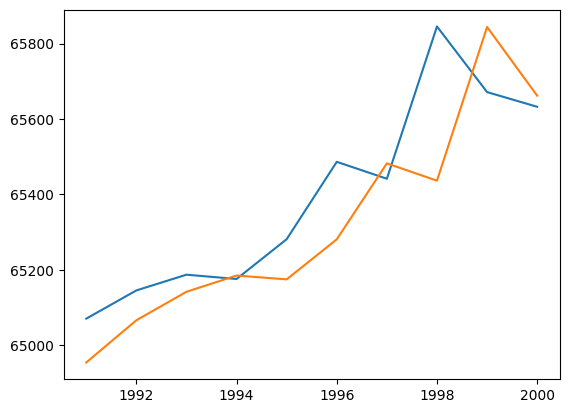

In [97]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

#create model
model = ARIMA(y, order=(2, 1, 0)) 
# train model
model_fit = model.fit()
# make prediction
predictions = model_fit.predict(len(y)-10, len(y)-1)

pd.DataFrame({'observed':y, 'predicted':predictions})

plt.plot(y[-10:])
plt.plot(predictions)
plt.show()

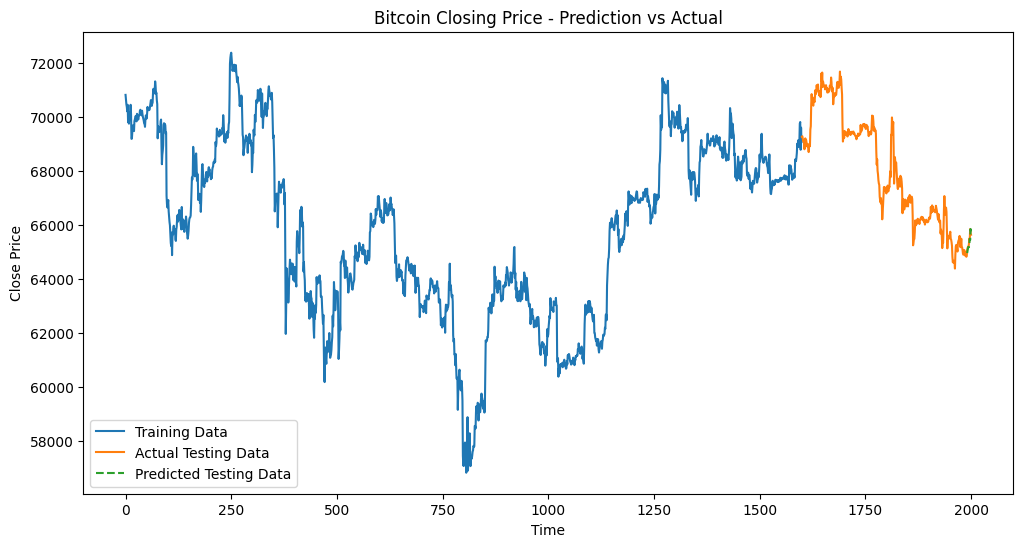

In [98]:
# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(y_train, label='Training Data')
plt.plot(y_test, label='Actual Testing Data')
plt.plot(predictions, label='Predicted Testing Data', linestyle='--')
plt.title('Bitcoin Closing Price - Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()